       normal        chi
0   10.748416   5.319318
1    9.461243   8.541487
2    8.111249   1.203568
3    8.527868   9.686636
4    8.385192   2.593833
5    9.024729  18.103828
6    7.957044   2.149086
7    5.755172   5.019109
8    8.324705   3.020889
9   12.393210   6.971881
10   0.560317   7.679501
11  14.002039   1.401713
12  16.304436   3.117187
13   8.963155   1.433678
14   9.169846   1.312079
15   7.580695   4.894418
16  12.419027   8.785245
17  12.513038   3.241993
18  12.361769   0.853227
19   5.446856   4.555128
20  10.637607   2.047437
21   8.424481   0.353322
22   5.708261  11.509231
23   6.160317   1.096181
24   9.313740   4.999168
25   3.155649  11.716320
26  10.369215   1.320590
27   9.453665   2.449266
28   5.021779   3.441429
29  11.533133   3.433334
30   4.611580   1.632973
31   4.860256   3.247508
32  10.035379   3.269557
33   8.173054   3.537406
34   7.129655   1.508573
35  10.695645   3.967248
36  10.183700   3.901006
37   8.122353   3.261331
38   7.201326   1.712739


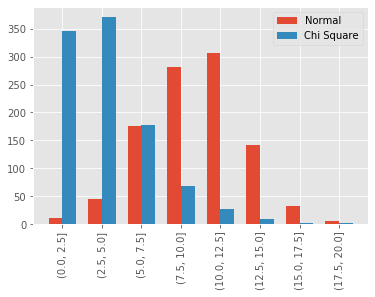


Logarithmic
[ 0.41796645  0.726079    1.26132306  2.19113327  3.80637218  6.61231763
 11.48672343 19.95439761]


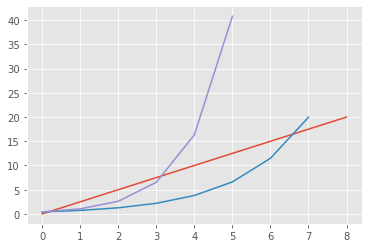

n
[10. 10. 10. 10. 10. 10. 10. 10. 10. 10.]
bins
[-3.23905405 -1.42837659 -0.67397639 -0.39246484 -0.20466163  0.16944396
  0.45879653  0.78142863  0.90809837  1.34636322  2.25789733]
patches
<a list of 10 Patch objects>


ImportError: cannot import name 'KBinsDiscretizer' from 'sklearn' (c:\program files\python37\lib\site-packages\sklearn\__init__.py)

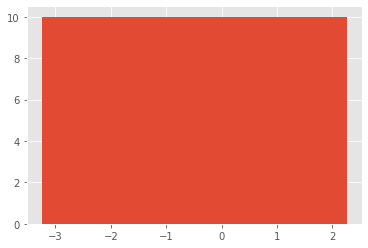

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data
df = pd.DataFrame({'normal': np.random.normal(10, 3, 1000), 'chi': np.random.chisquare(4, 1000)})
print(df.head(50))

nBins = 8
pd.cut(df['normal'], nBins)
pd.cut(df['chi'], nBins)

bins = np.linspace(0, 20, nBins+1)
print('Linear ', bins)

df['normal'] = pd.cut(df['normal'], bins)
df['chi'] = pd.cut(df['chi'], bins, labels=['Level1','Level2','Level3','Level4','Level5','Level6','Level7','Level8'])
print(df.head())

plt.style.use('ggplot')

sizeNormal = df.groupby('normal').size()
sizeChi = df.groupby('chi').size()

cats = df['normal'].cat.categories
idx = np.array([x for x, _ in enumerate(cats)])
width = 0.35       
plt.bar(idx, sizeNormal, width, label='Normal')
plt.bar(idx + width, sizeChi, width, label='Chi Square')

plt.xticks(idx + width / 2, cats)
plt.legend(loc='best')
plt.xticks(rotation = 90)
plt.show()

# Logarithmic binning
df = pd.DataFrame({'normal': np.random.normal(10, 3, 1000), 'chi': np.random.chisquare(4, 1000)})

# Specifying the number of bins
bins2 = np.logspace(np.log10(np.min(df['normal'])), np.log10(np.max(df['normal'])), num=8)
print("\nLogarithmic")
print(bins2)

# Specifying the multiplier
multiplier = 2.5
bins3 = [np.min(df['normal'])]
curValue = bins3[0]
while curValue < np.max(df['normal']):
    curValue = curValue * multiplier
    bins3.append(curValue)

plt.plot(bins)
plt.plot(bins2)
plt.plot(bins3)
plt.show()

# Binning by equal number in each bin
def EqualNumBinning(x, nBins):
    n = len(x)
    return np.interp(np.linspace(0, n, nBins + 1), np.arange(n), np.sort(x))

x = np.random.randn(100)
n, bins, patches = plt.hist(x, EqualNumBinning(x, 10))
print("n")
print(n)
print("bins")
print(bins)
print("patches")
print(patches)

from sklearn import KBinsDiscretizer

X = np.array([[ -3., 5., 15 ], [  0., 6., 14 ], [  6., 3., 11 ]])
est = preprocessing.KBinsDiscretizer(n_bins=[3, 2, 2], encode='ordinal').fit(X)
est.transform(X)